# Validation: MCMC stability

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* plots the rhat statistic for the mcmc

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

sns.set_style("ticks")
%matplotlib inline

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


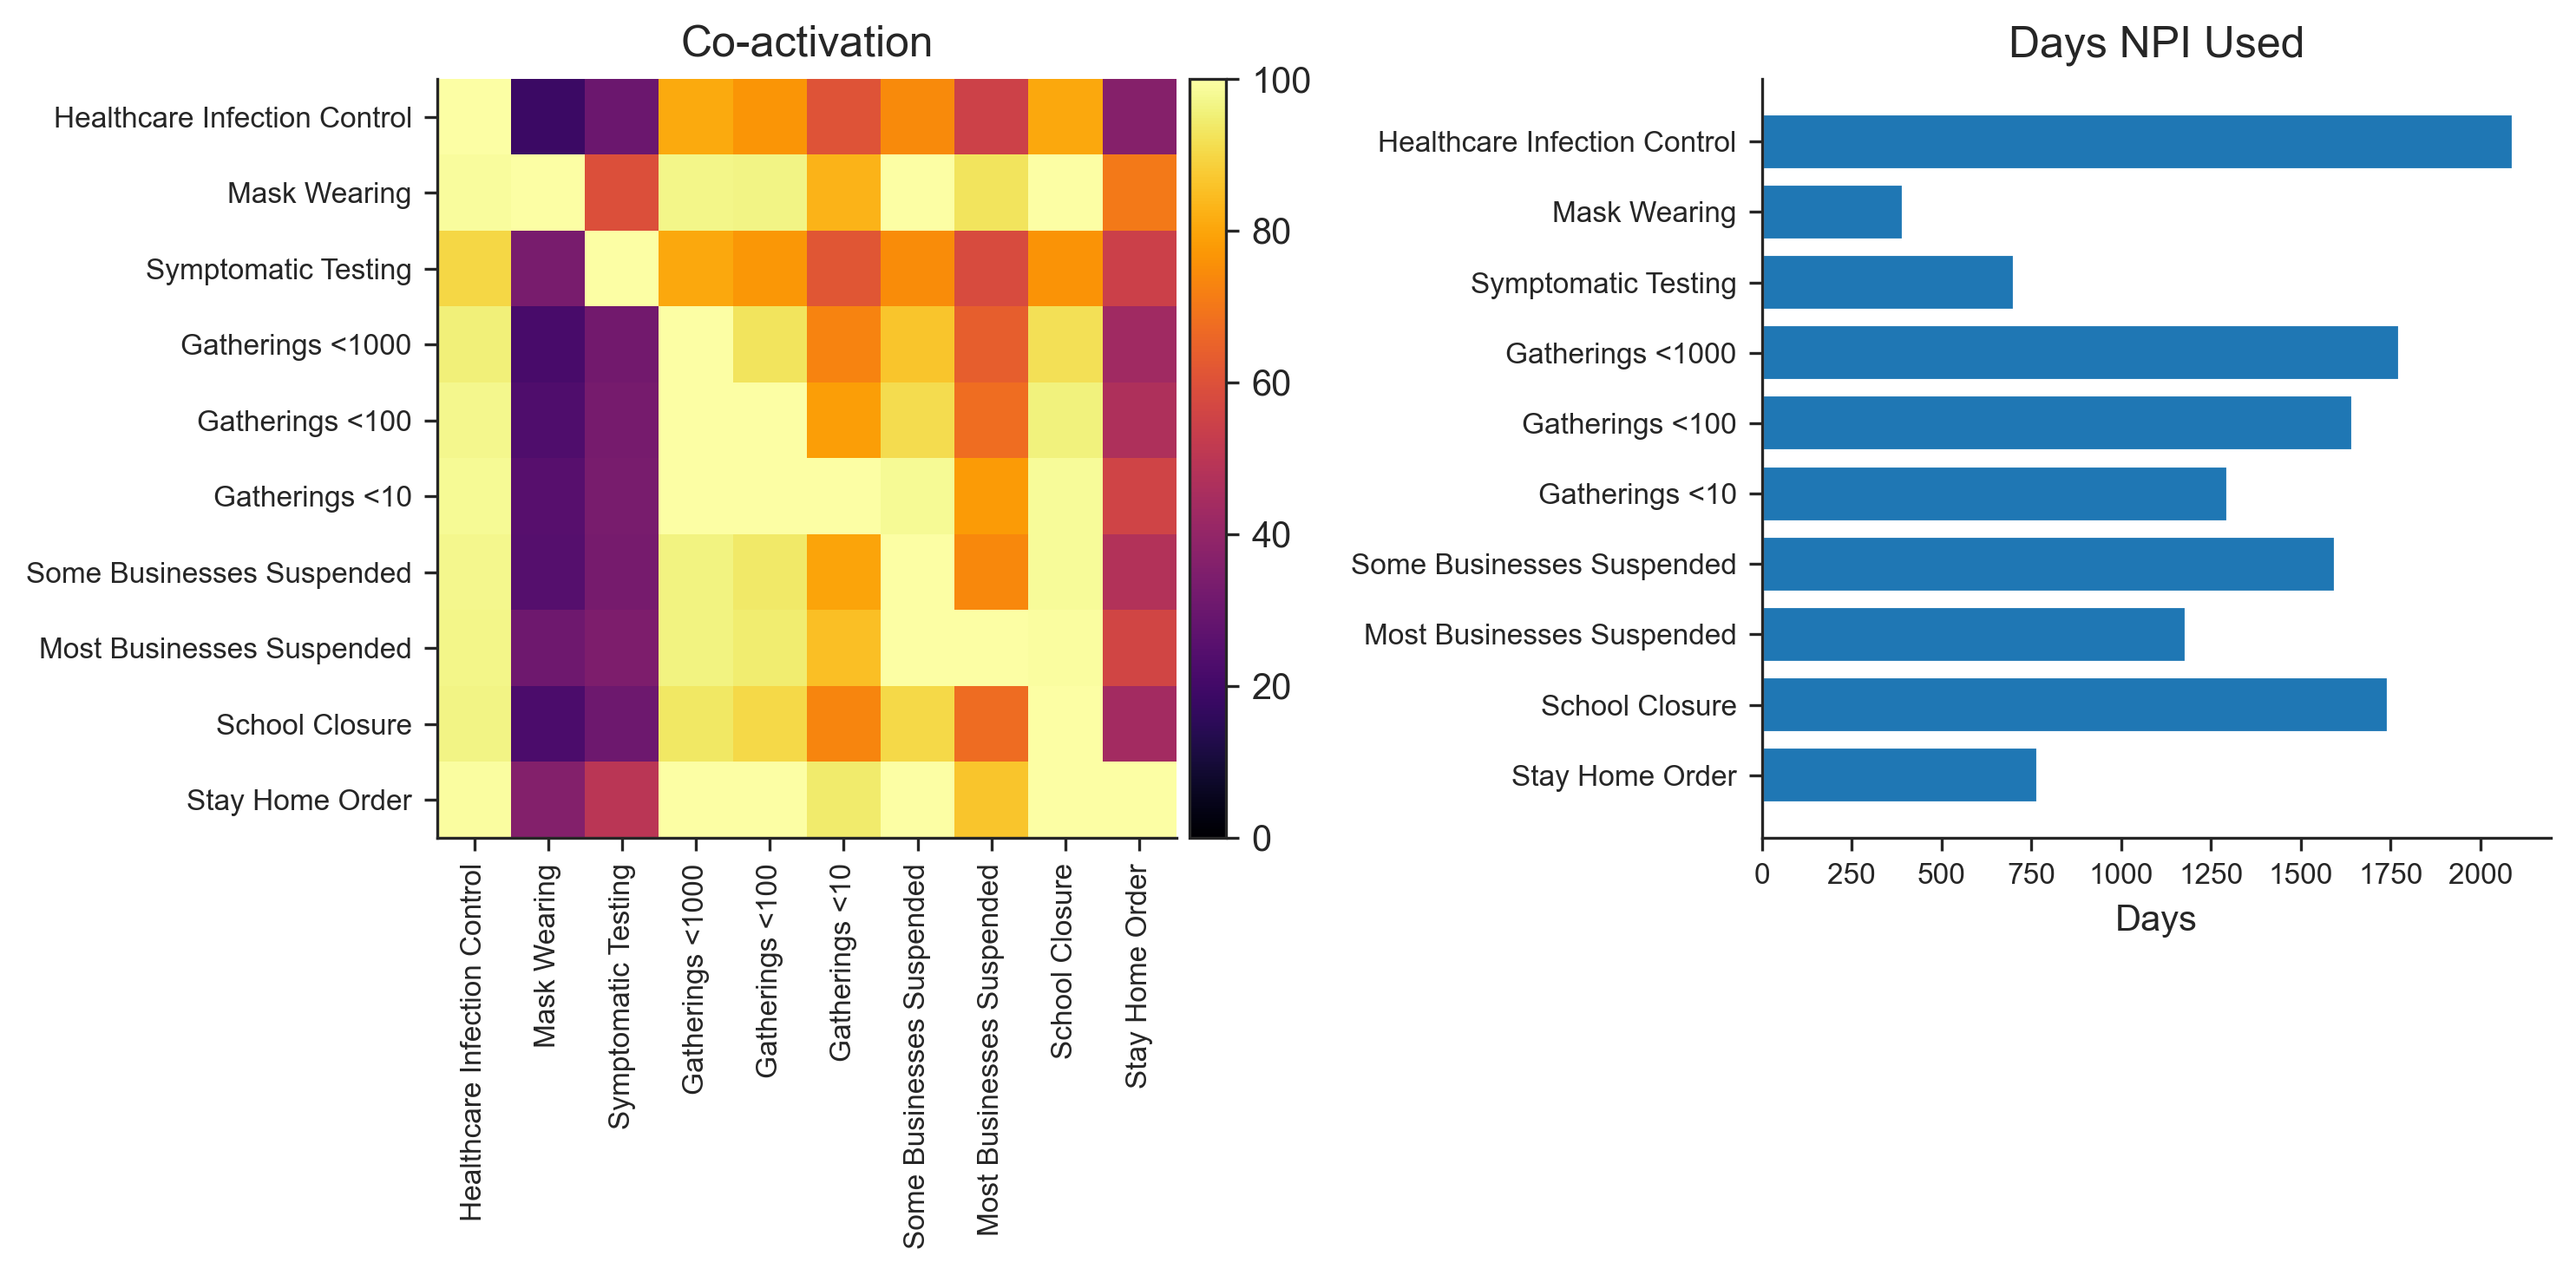

In [3]:
dp = DataPreprocessor()
data = dp.preprocess_data("data_final.csv")

In [5]:
def mask_region_ends(d, region, ndays=10):
    i = d.Rs.index(region)
    d.Active.mask[i,-ndays:] = True
    d.Confirmed.mask[i,-ndays:] = True
    d.Deaths.mask[i,-ndays:] = True
    d.NewDeaths.mask[i,-ndays:] = True
    d.NewCases.mask[i,-ndays:] = True

for region in data.Rs:
    mask_region_ends(data, region, 7)

mask_region_ends(data, "ES", 40)
mask_region_ends(data, "FR", 40)

#### Build models

In [64]:
models=[]
with cm_effect.models.CMActive_Final(data) as model:
    model.build_model()
    models.append(model)
with cm_effect.models.CMDeath_Final(data) as model:
    model.build_model()
    models.append(model)
with cm_effect.models.CMCombined_Final(data) as model:
    model.build_model()
    models.append(model)

Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)] for AL
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3),

#### Run Models

In [68]:
for model in models:
    print(model)
    with model.model:
        model.trace = pm.sample(2000, chains=2, target_accept=0.95)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:04:20<00:00,  1.30draws/s]
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...


WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpp3l3dohp/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpqcxjlpn2/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpu8a9zh_a/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpuqdrzu5i/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpymlon7d9/key.pkl because the corres

WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpjexpxis6/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpkag8_0od/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpouxp9qjz/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpp1wk231y/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/annie/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.2-64/tmpp3ojt_1p/key.pkl because the corres

Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:08:30<00:00,  1.22draws/s]


In [69]:
#model.plot_effect()

##### Get the r-hat values for each random variable

In [71]:
r_hats_list = []
for model in models:
    r_hats = az.rhat(model.trace)
    r_hats_list.append(r_hats)

[CM_Alpha, RegionLogR, GrowthCases, GrowthDeaths, InitialSizeCases_log, InitialSizeDeaths_log]
[CM_Alpha, HyperRMean, HyperRVar_log__, RegionLogR, Growth, InitialSize_log]
[CM_Alpha, RegionLogR, Growth, InitialSize_log, Phi_log__]


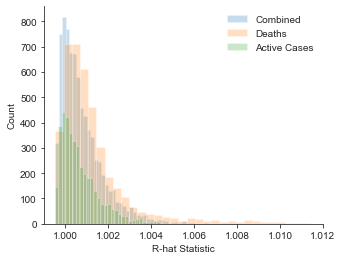

In [134]:
plt.figure(figsize=(5,4))
model_names = ['Active Cases', 'Deaths', 'Combined']
for j in range(len(models)):
    model_names_rev = model_names[::-1]
    models_rev = models[::-1]
    r_hats_rev = r_hats_list[::-1]
    model = models_rev[j]
    r_hats = r_hats_rev[j]
    print(model.vars)
    #print(r_hats)
    rhat_all = []
    rhat_nums = []
    for i in range(len(model.vars)):
        var = model.vars[i]
        if str(var)[-6:-1]=='_log_':
            var = str(var)[0:-6]
        if r_hats[str(var)].size>1:
            rhat_all.append(r_hats[str(var)].to_dataframe().to_numpy().flatten())
        else:
            rhat_nums.append(float(r_hats[str(var)]))
    rhat_all = np.concatenate(np.array(rhat_all))
    rhat_all = np.concatenate([rhat_all, rhat_nums])
    sns.distplot(rhat_all, kde=False, hist_kws={"alpha": 0.25}, label = model_names_rev[j])   
plt.ylabel('Count')
plt.xlabel('R-hat Statistic')
plt.xlim([0.999, 1.012])
sns.despine()
plt.legend(frameon=False)
plt.savefig('out/rhat_dist_all.pdf')

Text(0.5, 1.0, 'Selected Variables')

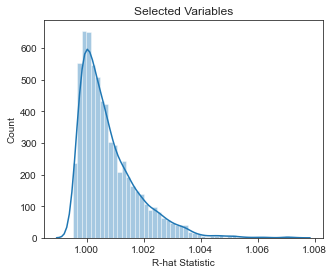

In [60]:
selected_vars = ['RegionLogR', 
                 'Growth', 
                 'InitialSize_log']

rhat_all = []
for i in range(len(selected_vars)):
    var = selected_vars[i]
    rhat_all.append(r_hats[str(var)].to_dataframe().to_numpy().flatten())
rhat_all = np.concatenate(np.array(rhat_all))
plt.figure(figsize=(5,4))
sns.distplot(rhat_all)   
plt.ylabel('Count')
plt.xlabel('R-hat Statistic')
plt.title('Selected Variables')

##### get the Effective Sample Size (ESS)

In [135]:
ess_list = []
for model in models:
    ess = az.ess(model.trace)
    ess_list.append(ess)

[CM_Alpha, RegionLogR, GrowthCases, GrowthDeaths, InitialSizeCases_log, InitialSizeDeaths_log]
[CM_Alpha, HyperRMean, HyperRVar_log__, RegionLogR, Growth, InitialSize_log]
[CM_Alpha, RegionLogR, Growth, InitialSize_log, Phi_log__]


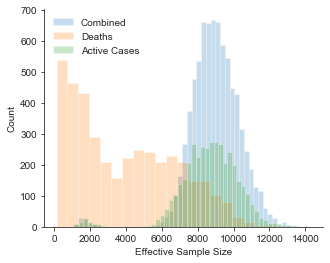

In [142]:
plt.figure(figsize=(5,4))
for j in range(len(models)):
    model_names_rev = model_names[::-1]
    models_rev = models[::-1]
    ess_list_rev = ess_list[::-1]
    model = models_rev[j]
    ess = ess_list_rev[j]
    print(model.vars)
    ess_all = []
    ess_num = []
    for i in range(len(model.vars)):
        var = model.vars[i]
        if str(var)[-6:-1]=='_log_':
            var = str(var)[0:-6]
        if ess[str(var)].size>1:
            ess_all.append(ess[str(var)].to_dataframe().to_numpy().flatten())
        else:
            ess_num.append(float(ess[str(var)]))
    ess_all = np.concatenate(np.array(ess_all))
    ess_all = np.concatenate([ess_all, ess_num])
    sns.distplot(ess_all, kde=False, label=model_names_rev[j], hist_kws={"alpha": 0.25})   
plt.ylabel('Count')
plt.xlabel('Effective Sample Size')
sns.despine()
plt.legend(frameon=False)
plt.savefig('out/ess_dist_all.pdf')